In [ ]:
import numpy as np

rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)

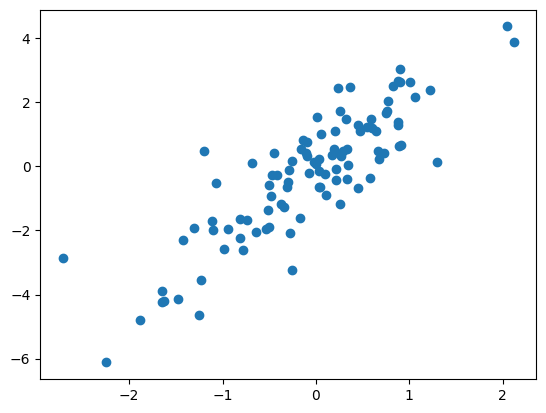

In [52]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(x, y);

In [53]:
import statsmodels.api as sm

results = sm.OLS(y, x).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Fri, 18 Jul 2025   Prob (F-statistic):                    6.23e-31
Time:                        16:23:37   Log-Likelihood:                         -141.35
No. Observations:                 100   AIC:                                      284.7
Df Residuals:                      99   BIC:                                      287.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.9762      0.117     16.898      0.000       1.744       2.208
==============================================================================
Omnibus:                        1.376   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.503   Jarque-Bera (JB):                0.847
Skew:                           0.121   Prob(JB):                        0.655
Kurtosis:                       3.381   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

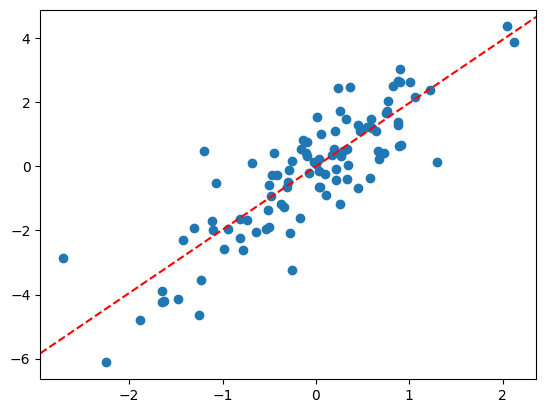

In [54]:
fig, ax = plt.subplots()

ax.scatter(x, y);
ax.axline(xy1=(0, 0), slope=results.params[0], color='r', linestyle='--');

As expected, the predictor $x$ is highly significant, with a p-value effectively equal to zero. The estimated coefficient for $x$ is 1.9762, which is very close to the true underlying value of 2 used to generate the data. The standard error of 0.117 suggests a tight confidence interval that includes the true coefficient, confirming the accuracy of the estimate.

The R-squared (uncentered) value of 0.743 indicates that approximately 74% of the variance in $y$ is explained by the model, which is consistent with the strong linear relationship in the data. The remaining 26% reflects noise introduced by the random error term. Since the model is a simple univariate regression without an intercept, it is less flexible, but still performs well given the structure of the data.

In [55]:
import statsmodels.api as sm

results = sm.OLS(x, y).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Fri, 18 Jul 2025   Prob (F-statistic):                    6.23e-31
Time:                        16:23:38   Log-Likelihood:                         -58.349
No. Observations:                 100   AIC:                                      118.7
Df Residuals:                      99   BIC:                                      121.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3757      0.022     16.898      0.000       0.332       0.420
==============================================================================
Omnibus:                       13.156   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.596
Skew:                          -0.528   Prob(JB):                     1.24e-05
Kurtosis:                       5.075   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

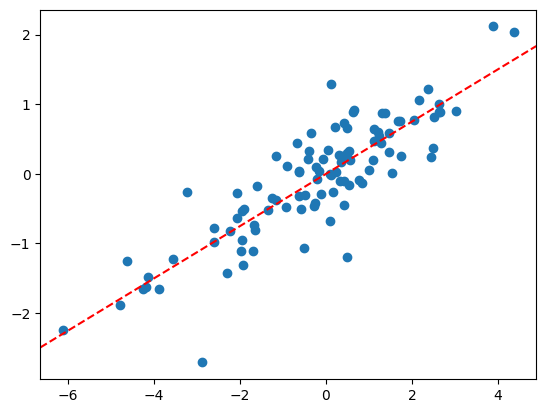

In [56]:
fig, ax = plt.subplots()

ax.scatter(y, x);
ax.axline(xy1=(0, 0), slope=results.params[0], color='r', linestyle='--');

This time, something unexpected happens. Intuitively, we might expect that the slope from regressing $x$ onto $y$ would be the inverse of the slope from regressing $y$ onto $x$, in this case, $0.5$. However, the slope we found is about $0.37$ with a standard error of $0.022$, and this interval does not contain the expected value $0.5$. Why is this?

We know the regression is performed without an intercept, so the means $\bar{x}$ and $\bar{y}$ are effectively zero, which leads to the following formulas for the slopes:

$$
\hat{\beta}_{yx} = \frac{\sum x_i y_i}{\sum x_i^2} \quad \text{and} \quad \hat{\beta}_{xy} = \frac{\sum x_i y_i}{\sum y_i^2}.
$$

For $\hat{\beta}_{xy}$ to be exactly the reciprocal of $\hat{\beta}_{yx}$, the following must hold:

$$
\hat{\beta}_{xy} = \frac{1}{\hat{\beta}_{yx}} \quad \Longrightarrow \quad \frac{\sum x_i y_i}{\sum x_i^2} = \frac{\sum y_i^2}{\sum x_i y_i} \quad \Longrightarrow \quad (\sum x_i y_i)^2 = \sum x_i^2 \cdot \sum y_i^2.
$$

This equality is true only when $x$ and $y$ are perfectly correlated, i.e., when the points lie exactly on a line without any noise.

Since in our case $y = 2x + \varepsilon$ with noise $\varepsilon$, $x$ and $y$ are not perfectly correlated. Therefore, the slope $\hat{\beta}_{xy}$ from regressing $x$ on $y$ deviates from the true reciprocal value $1/2$.

Let's prove:

$$
\text{t-stat} = \frac{(\sqrt{n-1}) \sum_{i=1}^n x_i y_i}{\sqrt{ \left( \sum_{i=1}^n x_i^2 \right) \left( \sum_{i=1}^n y_i^2 \right) - \left( \sum_{i=1}^n x_i y_i \right)^2 }}
$$

We have:

$$
\text{SE}(\hat{\beta}) = \sqrt{ \frac{ \sum_{i=1}^n (y_i - x_i \hat{\beta})^2 }{ (n - 1) \sum_{i=1}^n x_i^2 } }
$$

and:

$$
\hat{\beta} = \frac{ \sum x_i y_i }{ \sum x_i^2 }
$$

Therefore:

$$
\text{t-stat} = \frac{ \hat{\beta} }{ \text{SE}(\hat{\beta}) } 
= \frac{ \sum x_i y_i }{ \sum x_i^2 } \cdot \frac{ \sqrt{n - 1} \cdot \sqrt{ \sum x_i^2 } }{ \sqrt{ \sum (y_i - \hat{\beta} x_i)^2 } }
$$

Now we simplify the denominator:

$$
\sum (y_i - \hat{\beta} x_i)^2 
= \sum y_i^2 + \hat{\beta}^2 \sum x_i^2 - 2 \hat{\beta} \sum x_i y_i
$$

So we get:

$$
\text{t-stat} 
= \frac{ \sqrt{n - 1} \sum x_i y_i }{ \sqrt{ \sum x_i^2 } \cdot \sqrt{ \sum y_i^2 + \hat{\beta}^2 \sum x_i^2 - 2 \hat{\beta} \sum x_i y_i } }
$$

Factor $\sum x_i^2$ into the outer square root:

$$
= \frac{ \sqrt{n - 1} \sum x_i y_i }{ \sqrt{ \sum x_i^2 \cdot \left( \sum y_i^2 + \hat{\beta}^2 \sum x_i^2 - 2 \hat{\beta} \sum x_i y_i \right) } }
$$

Now expand:

$$
= \frac{ \sqrt{n - 1} \sum x_i y_i }{ \sqrt{ \sum x_i^2 \sum y_i^2 + \hat{\beta}^2 (\sum x_i^2)^2 - 2 \hat{\beta} \sum x_i^2 \sum x_i y_i } }
$$

Substitute $\hat{\beta} = \frac{ \sum x_i y_i }{ \sum x_i^2 }$:

First, note:

$$
\hat{\beta}^2 (\sum x_i^2)^2 = (\sum x_i y_i)^2
\quad \text{and} \quad
2 \hat{\beta} \sum x_i^2 \sum x_i y_i = 2 (\sum x_i y_i)^2
$$

So the denominator becomes:

$$
\sum x_i^2 \sum y_i^2 + (\sum x_i y_i)^2 - 2 (\sum x_i y_i)^2 = \sum x_i^2 \sum y_i^2 - (\sum x_i y_i)^2
$$

Thus, we conclude:

$$
\text{t-stat} = \frac{ (\sqrt{n - 1}) \sum x_i y_i }{ \sqrt{ (\sum x_i^2)(\sum y_i^2) - (\sum x_i y_i)^2 } }
$$

In [57]:
tstat_ols = results.tvalues[0]

sum_xy = np.sum(x * y)
sum_x2 = np.sum(x ** 2)
sum_y2 = np.sum(y ** 2)

n = len(x)

tstat_manual = (np.sqrt(n - 1) * sum_xy) / np.sqrt(sum_x2 * sum_y2 - sum_xy ** 2)

print(f"OLS t-stat:     {tstat_ols:.5f}")
print(f"Manual t-stat:  {tstat_manual:.5f}")

OLS t-stat:     16.89842
Manual t-stat:  16.89842


We showed in (d) that the t-statistic for the regression of $y$ onto $x$ (without intercept) is:

$$
\text{t-stat} = \frac{ \sqrt{n - 1} \sum x_i y_i }{ \sqrt{ \left( \sum x_i^2 \right) \left( \sum y_i^2 \right) - \left( \sum x_i y_i \right)^2 } }
$$

Now suppose we regress $x$ onto $y$. Then in this formula, every instance of $x_i$ and $y_i$ swaps roles.

So the t-statistic becomes:

$$
\text{t-stat} = \frac{ \sqrt{n - 1} \sum y_i x_i }{ \sqrt{ \left( \sum y_i^2 \right) \left( \sum x_i^2 \right) - \left( \sum y_i x_i \right)^2 } }
$$

But since multiplication and summation are commutative:

* $\sum x_i y_i = \sum y_i x_i$
* $\sum x_i^2$ and $\sum y_i^2$ remain in the same product
* The denominator remains the same because it is symmetric in $x_i$ and $y_i$

So the formula is identical after swapping — thus, the t-statistic is the same whether you regress $y$ on $x$ or $x$ on $y$, provided there's no intercept.

In [58]:
x_with_intercept = sm.add_constant(x)
y_with_intercept = sm.add_constant(y)

results_xy = sm.OLS(y, x_with_intercept).fit()
results_yx = sm.OLS(x, y_with_intercept).fit()

In [61]:
t_y_on_x = results_yx.tvalues[1]
t_x_on_y = results_xy.tvalues[1]

print(f"t-stat (y ~ x): {t_y_on_x:.5f}")
print(f"t-stat (x ~ y): {t_x_on_y:.5f}")

t-stat (y ~ x): 16.73406
t-stat (x ~ y): 16.73406
